In [391]:
#Dependencies
from citipy import citipy
import requests
import random as rd
import csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools


In [392]:
# Set our URL
api_key = "68587a2872533b3d38e97d04482a812b"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [393]:
# Testing citipy
#city = citipy.nearest_city(48.86, 2.35)
#city.city_name
#city.country_code
#print(rd.random()*90)

In [394]:
# Generate cities list
rand_lat = [90,-90] # List of numbers that we want random.choice() to select to generate latitudes randomly
rand_long = [180,-180] # List of numbers that we want random.choice() to select to generate longitudes randomly

cities = [] # List where city names will be stored
lat = [] # Make a list of latitudes
long = [] # Make a list of longitudes

for i in range(1,1500):
    lt = rd.random() * rd.choice(rand_lat) #latitude
    lg = rd.random() * rd.choice(rand_long) #longitude
    lat.append(lt) 
    long.append(lg)
    
    generated_city = citipy.nearest_city(lt ,lg)
    cities.append(generated_city.city_name)
    
#Remove duplicate city names from the list:
city_set = set(cities)
non_duplicate_cities = list(city_set)
print("Number of cities (without duplicates):")
print(len(non_duplicate_cities))


Number of cities (without duplicates):
614


In [395]:
# Declare lists that will be populated later
found_cities = []
temp = []
humidity = []
cloudiness = []
windspeed = []
latitude = []
longitude = []


In [396]:
# Loop through the list of non-duplicate cities and perform a request for data on each
for city in non_duplicate_cities:
    
    response = requests.get(query_url + city).json()
    #print(response)
    try:
        found_cities.append(response['name'])
        latitude.append(response['coord']['lat'])  
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['weather'][0]['description']) 
        windspeed.append(response['wind']['speed'])
    except KeyError:
        #print(city + " not found!")
        print("Retieving data.......")
#Select 500 results from the ones generated from above:
#------------------------------------------------------
top500_cities = found_cities[: 500] # grab the first five hundred cities
print("Number of cities retrieved: ")
print(len(top500_cities))
top500_latitude = latitude[: 500] # grab the first five hundred latitudes
print("Number of latitudes retrieved: ")
print(len(top500_latitude))
top500_longitude = longitude[: 500] # grab the first five hundred longitudes
print("Number of longitudes retrieved: ")
print(len(top500_longitude))
top500_temp = temp[: 500] # grab the first five hundred temperatures
print("Number of temperatures retrieved: ")
print(len(top500_temp))
top500_humidity = humidity[: 500] # grab the first five hundred humidities
print("Number of humidities retrieved: ")
print(len(top500_humidity))
top500_cloudiness = cloudiness[: 500] # grab the first five hundred cloudiness
print("Number of cloud conditions retrieved: ")
print(len(top500_cloudiness))
top500_windspeed = windspeed[: 500] # grab the first five hundred windspeeds
print("Number of windspeeds retrieved: ")
print(len(top500_windspeed))

Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving data.......
Retieving 

In [404]:
# Create a dictionary with all the available data 
weather_dict = {
    "City": top500_cities,
    "Latitude": top500_latitude,
    "Longitude":top500_longitude,
    "Temperature": top500_temp,
    "Humidity": top500_humidity,
    "Cloudiness": top500_cloudiness,
    "Windspeed":top500_windspeed
}
#print(weather_dict)

In [405]:
# Create a dataframe out of the above dictionary
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Windspeed
0,Vostok,clear sky,72,46.45,135.83,-13.50,1.58
1,Ushuaia,shower rain,75,-54.81,-68.31,7.00,14.40
2,Hervey Bay,broken clouds,96,-25.30,152.85,24.76,6.73
3,Pizarro,light rain,99,4.95,-77.37,25.01,2.78
4,Vozrozhdeniye,light snow,92,60.86,28.96,-5.00,4.10


In [406]:
# Writing the data to a csv file

weather_df.to_csv("weather.csv")
len(weather_df)

500

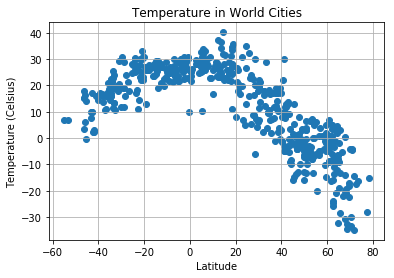

In [407]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

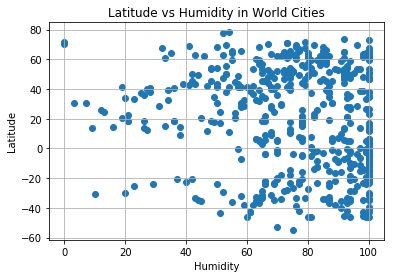

In [412]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Humidity"], weather_df["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLatitudeOfWorldCities.png")

# Show plot
plt.show()

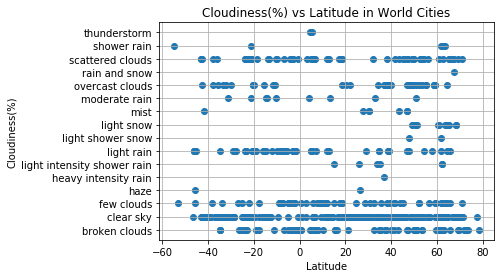

In [409]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness(%) vs Latitude in World Cities")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessVsLatitudeOfWorldCities.png")

# Show plot
plt.show()

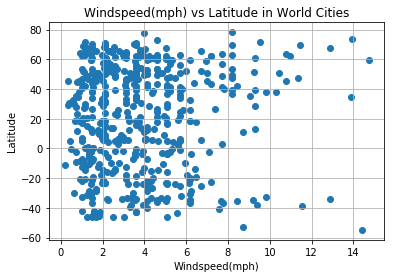

In [410]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Windspeed"], weather_df["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed(mph) vs Latitude in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Windspeed(mph)")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedVsLatitudeOfWorldCities.png")

# Show plot
plt.show()